Machine Learning

Common Functions

In [1]:
import numpy as np
import pandas as pd

def loadDataset(filename, deli):
    baseDeDados = pd.read_csv(filename, delimiter=deli)
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

def computeCategorization(X):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    #one hot encoding
    D = pd.get_dummies(X[:,0]).values
    
    X = X[:,1:]
    for ii in range(0, D.shape[1]):
        X = np.insert(X, X.shape[1], D[:,ii], axis=1)
    X = X[:,:X.shape[1] - 1]

    return X

def splitTrainTestSets(X, y, testSize):
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

def computeScaling(X):
    from sklearn.preprocessing import StandardScaler
    scaleobj = StandardScaler()
    X = scaleobj.fit_transform(X.astype(float))

    return X, scaleobj

Logistic Regression Classification

In [2]:
def computeLogisticRegressionModel(XTrain, yTrain, XTest):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(solver='lbfgs')
    classifier.fit(XTrain[0], yTrain)
    return classifier

def predictModel(classifier, XTest):
    return classifier.predict(XTest[0])

def evaluateModel(classifier, yPred, yTest):
    from sklearn.metrics import confusion_matrix
    confusionMatrix = confusion_matrix(yTest, yPred)
    return confusionMatrix
    
def computeLogisticRegressionExample(filename):
    X, y, csv = loadDataset(filename, ",")
    X = fillMissingData(X, 2, 3)

    #sex
    X = computeCategorization(X)
    #embark
    X = computeCategorization(X)

    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
    XTrain = computeScaling(XTrain)
    XTest = computeScaling(XTest)

    classifier = computeLogisticRegressionModel(XTrain, yTrain, XTest)
    yPred = predictModel(classifier, XTest)
    return evaluateModel(classifier, yPred, yTest)

In [3]:
def printAccuracy(confusionMatrix):
    accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / (confusionMatrix[0][0] + confusionMatrix[1][0] + confusionMatrix[0][1] + confusionMatrix[1][1])
    print(accuracy * 100)
confusionMatrix = computeLogisticRegressionExample("titanic.csv")
printAccuracy(confusionMatrix)

79.8507462686567


K-Nearest Neighbors

In [4]:
def computeKNNModel(XTrain, yTrain, XTest):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
    classifier.fit(XTrain[0], yTrain)
    return classifier

def predictModel(classifier, XTest):
    return classifier.predict(XTest[0])

def evaluateModel(classifier, yPred, yTest):
    from sklearn.metrics import confusion_matrix
    confusionMatrix = confusion_matrix(yTest, yPred)
    return confusionMatrix
    
def computeKNNExample(filename):
    X, y, csv = loadDataset(filename, ",")
    X = fillMissingData(X, 2, 3)
    #sex
    X = computeCategorization(X)
    #embark
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
    XTrain = computeScaling(XTrain)
    XTest = computeScaling(XTest)
    classifier = computeKNNModel(XTrain, yTrain, XTest)
    yPred = predictModel(classifier, XTest)
    return evaluateModel(classifier, yPred, yTest)

In [6]:
print(computeKNNExample("titanic.csv"))
print(computeKNNExample("pc.csv"))

[[68 16]
 [17 33]]
[[11  0]
 [ 4  0]]


In [7]:
def getAccuracy(confusionMatrix):
    accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / (confusionMatrix[0][0] + confusionMatrix[1][0] + confusionMatrix[0][1] + confusionMatrix[1][1])
    return accuracy * 100

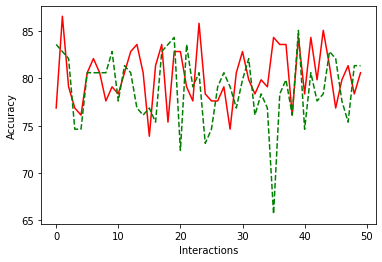

Mean and Standard deviation of Logistic Regression: 
80.19 2.97
Mean and Standard deviation of KNN: 
78.96 3.64


In [9]:
rlArray = []
for i in range(0, 50):
    confusionMatrixLR = computeLogisticRegressionExample("titanic.csv")
    rlArray.append(getAccuracy(confusionMatrixLR))
    
knnArray = []
for i in range(0, 50):
    confusionMatrixKNN = computeKNNExample("titanic.csv")
    knnArray.append(getAccuracy(confusionMatrixKNN))

import matplotlib.pyplot as plt
plt.plot(rlArray, 'r-', knnArray, 'g--')
plt.ylabel("Accuracy")
plt.xlabel("Interactions")
plt.show()

print("Mean and Standard deviation of Logistic Regression: ")
print("%.2f" % np.mean(rlArray), "%.2f" % np.std(rlArray))

print("Mean and Standard deviation of KNN: ")
print("%.2f" % np.mean(knnArray), "%.2f" % np.std(knnArray))